In [1]:
cd ../..

/Users/ericpei/Documents/GalvClas/fantasy-score-predictor


In [2]:
from scripts import MakeDF

In [3]:
from scripts import RandomForest

/Users/ericpei/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
#MakeDF.create_csvs('alldata')

In [5]:
df = MakeDF.create_df()

In [6]:
df = MakeDF.clean_df(df)

scripts/MakeDF.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['MP'] = df['MP'].map(lambda x: '0:00' if ":" not in str(x) else str(x))


In [7]:
df = MakeDF.drop_zerominutes(df)

In [8]:
df = MakeDF.add_features(df)

In [9]:
Player_Averages = MakeDF.make_averages(df)

In [10]:
date_matrix = MakeDF.get_date_matrix(df)

In [11]:
MakeDF.previous_sp(9, date_matrix)

215

In [12]:
MakeDF.addcolumns(MakeDF.make_lists(date_matrix), df)

In [14]:
tp_matrix = df[['Player Name', '3P']].values
fg_matrix = df[['Player Name', 'FG']].values
ft_matrix = df[['Player Name', 'FT']].values
reb_matrix = df[['Player Name', 'TRB']].values
ast_matrix = df[['Player Name', 'AST']].values
blk_matrix = df[['Player Name', 'BLK']].values
stl_matrix = df[['Player Name', 'STL']].values
tov_matrix = df[['Player Name', 'TOV']].values
usg_matrix = df[['Player Name', 'USG%']].values
ftr_matrix = df[['Player Name', 'FTr']].values
pm_matrix = df[['Player Name', '+/-']].values
ts_matrix = df[['Player Name', 'TS%']].values
pf_matrix = df[['Player Name', 'PF']].values
ortg_matrix = df[['Player Name', 'ORtg']].values
drtg_matrix = df[['Player Name', 'DRtg']].values

In [16]:
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=tp_matrix, column='3P'), df, name='TP')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=fg_matrix, column='FG'), df, name='FG')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=ft_matrix, column='FT'), df, name='FT')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=reb_matrix, column='TRB'), df, name='TRB')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=ast_matrix, column='AST'), df, name='AST')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=blk_matrix, column='BLK'), df, name='BLK')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=stl_matrix, column='STL'), df, name='STL')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=tov_matrix, column='TOV'), df, name='TOV')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=usg_matrix, column='USG%'), df, name ='USGP')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=ftr_matrix, column='FTr'), df, name ='FTr')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=pm_matrix, column='+/-'), df, name ='PM')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=ts_matrix, column='TS%'), df, name ='TSP')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=pf_matrix, column='PF'), df, name ='PF')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=ortg_matrix, column='ORtg'), df, name ='ORtg')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=drtg_matrix, column='DRtg'), df, name ='DRtg')

In [17]:
from scripts import ElevationFlight

In [18]:
Elevation_Lookup = ElevationFlight.read_to_dict()

In [19]:
ElevationFlight.lookup_and_add(Elevation_Lookup, df)

# PLAY HERE

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
forest_df, y_df = RandomForest.prepare_for_forest(df)

In [23]:
Stephcurry, Stephcurry_X, Stephcurry_y = RandomForest.individual_forest_df(forest_df, y_df, 'Stephen Curry')

In [24]:
X_train, X_test, y_train, y_test = RandomForest.crossval_player(Stephcurry, forest_df[forest_df["Player Name"] != 'Stephen Curry'], y_df[y_df['Player Name'] != 'Stephen Curry'], cat=2)
X_train2, X_test2, y_train2, y_test2 = RandomForest.crossval_player(Stephcurry, Stephcurry_X, Stephcurry_y, cat=2)

scripts/RandomForest.py:51: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  X_train, X_test, y_train, y_test = train_test_split(player_x[player_x.columns-['Player Name']], player_y.iloc[:,cat], test_size = 0.25, random_state = 30)


In [25]:
X_train = pd.concat([X_train, X_train2])
y_train = pd.concat([y_train, y_train2])

In [26]:
everyFGmean = X_train.FG1dayago.mean()
stephFGmean = X_train2.FG1dayago.mean()

In [27]:
len(X_test), len(X_test2)

(67887, 123)

In [28]:
benchmark = np.full(len(X_test), everyFGmean)
s_benchmark = np.full(len(X_test2), stephFGmean)

In [29]:
rf = RandomForestRegressor()
rf2 = RandomForestRegressor()

In [30]:
rf.fit(X_train, y_train)
rf2.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [31]:
rf.feature_importances_

array([ 0.00704308,  0.00647669,  0.00690824,  0.00710584,  0.00301332,
        0.00305821,  0.00322937,  0.00323594,  0.01423987,  0.01433926,
        0.0143437 ,  0.01400953,  0.01265888,  0.21836526,  0.07338078,
        0.05240295,  0.05795588,  0.00699537,  0.00693647,  0.00695156,
        0.00744326,  0.00942233,  0.0095045 ,  0.00883979,  0.00888239,
        0.01352056,  0.01315454,  0.01298488,  0.01325802,  0.00176918,
        0.00608099,  0.00584208,  0.00572084,  0.00617032,  0.01468174,
        0.0148234 ,  0.01475312,  0.01478961,  0.00728711,  0.01681407,
        0.01320859,  0.01225326,  0.00391411,  0.0037741 ,  0.00399698,
        0.00391916,  0.00553609,  0.00532809,  0.00529483,  0.00572978,
        0.00320138,  0.00339317,  0.00330985,  0.00346683,  0.00912922,
        0.00891608,  0.00917368,  0.0089136 ,  0.01549908,  0.014253  ,
        0.01441643,  0.01474628,  0.02305018,  0.02561173,  0.02145242,
        0.02011913])

In [32]:
y_predict = rf.predict(X_test)
y_predict2 = rf2.predict(X_test2)

In [33]:
mean_squared_error(y_test, y_predict), mean_squared_error(y_test2, y_predict2)

(5.6689635718178737, 11.841219512195122)

In [34]:
mean_squared_error(y_test, benchmark), mean_squared_error(y_test2, s_benchmark)

(9.0898905042244369, 10.628826347139844)

In [35]:
y_predict3 = rf.predict(X_test2)
mean_squared_error(y_test2, y_predict3)

10.109593495934959

# PCA

In [36]:
from sklearn.decomposition import PCA

In [ ]:
#df_green = df[df['Player Name'] == 'Danny Green']

In [ ]:
# def run_pca(df):
#     pca              = PCA(n_components=8, whiten=True)
#     pca.fit(df)
#     top95percent_PC  = get_95_var(pca.explained_variance_ratio_)
#     pca.n_components = top95percent_PC
#     X_reduced        = pca.fit_transform(df)
#     PCA_matrix       = pd.DataFrame(X_reduced)
#     return(PCA_matrix, pca.components_)

In [ ]:
# def get_95_var(array):
#     total = 0
#     pos = 0
#     for x in array:
#         total += x
#         pos   += 1
#         print pos-1, total
#         if total>=0.95:
#             #print total
#             return(pos)

In [37]:
bad_columns = ['Player Name', 'Away', 'Home', 'OneisHome', 'Date', 'DateM1', 'DateM2', 'DateM3', 'DateM4']

In [38]:
# cols_to_use = [x for x in df_green.columns if x not in bad_columns]
# df_to_use = df_green[cols_to_use]

In [39]:
cols_to_use = [x for x in Stephcurry_X.columns if x not in bad_columns]
df_to_use = Stephcurry_X[cols_to_use]

In [40]:
#feed_to_pca = df_to_use.iloc[:,:34]

In [41]:
#feed_to_pca['Elevation'] = df_to_use['Elevation']

In [42]:
#bad_columns2 = ['FG%', '3P%', 'FT%', 'TRB', '3PAr', 'FTr']

In [43]:
# cols_to_use = [x for x in feed_to_pca.columns if x not in bad_columns2]
# pca_nomnom = feed_to_pca[cols_to_use]

In [44]:
import datetime
from scripts import PCA_ready

In [45]:
pca_nomnom = df_to_use[['FG','FG','3P','TRB', 'AST', 'STL', 'BLK', 'TOV']]

KeyError: "['FG' 'FG' '3P' 'TRB' 'AST' 'STL' 'BLK' 'TOV'] not in index"

In [46]:
threecomp, vectors = PCA_ready.run_pca(pca_nomnom)

NameError: name 'pca_nomnom' is not defined

In [47]:
PA = MakeDF.make_averages(df, cutoff=120)

In [78]:
PA

,SP,3P,FG,FT,TRB,AST,BLK,STL,TOV,USG%,FTr,+/-,TS%,PF,ORtg,DRtg,Score
Player Name,,,,,,,,,,,,,,,,,
A.J. Price,903.298851,2.663036,6.706453,2.528663,4.605342,6.926336,0.109942,1.526970,2.797409,66.393882,0.603862,-0.195452,1.331628,2.895135,289.061550,347.440671,10.976628
Aaron Brooks,1393.973684,2.981951,8.239051,3.525645,3.864408,6.829630,0.301123,1.258860,3.571650,48.665188,0.467008,-0.326216,1.038041,4.148801,204.290824,227.749117,18.109919
Aaron Gordon,1071.042254,0.908947,5.983904,2.954079,10.755878,2.423860,1.666404,1.401294,2.348114,43.655989,1.129973,-6.211141,1.390538,5.188575,276.320025,283.250750,13.447887
Aaron Gray,726.471698,0.000000,5.485287,2.318780,14.835208,2.580578,1.084591,1.171857,3.303639,61.132275,1.299689,-4.699894,1.730234,8.452328,379.644184,425.221931,9.124214
Aaron Harrison,271.600000,2.120766,4.241532,4.241532,8.483063,0.000000,0.000000,2.120766,2.120766,160.754050,4.241532,2.120766,3.923417,0.000000,610.780560,1085.832106,2.560000
Aaron McKie,631.291667,0.000000,2.661210,0.190086,7.223286,4.562075,0.000000,1.710778,1.900865,31.668405,0.190086,-6.272853,1.336498,3.991816,289.691770,491.373507,4.941667
Aaron Miles,373.105263,0.000000,2.437579,1.625053,5.687685,9.750317,0.406263,1.625053,4.468895,106.400339,0.406263,-1.625053,2.104444,5.281422,678.459585,818.620398,3.568421
Aaron Williams,762.721739,0.000000,4.826651,2.364074,10.736835,1.083534,1.641718,1.182037,2.002896,44.549656,1.173007,-4.925154,1.720290,7.814577,364.362865,404.716291,7.990435
Acie Law,761.015957,0.543506,5.294155,3.462337,3.925324,6.220128,0.080519,1.670779,2.918831,64.274661,1.174175,-4.690259,1.503781,3.885064,353.158362,423.089515,7.720745


In [48]:
PA.head()

,SP,3P,FG,FT,TRB,AST,BLK,STL,TOV,USG%,FTr,+/-,TS%,PF,ORtg,DRtg,Score
Player Name,,,,,,,,,,,,,,,,,
A.J. Price,903.298851,0.835249,2.103448,0.793103,1.444444,2.172414,0.034483,0.478927,0.877395,20.824138,0.189398,-0.061303,0.417659,0.908046,90.662835,108.973180,10.976628
Aaron Brooks,1393.973684,1.443320,3.987854,1.706478,1.870445,3.305668,0.145749,0.609312,1.728745,23.554858,0.226040,-0.157895,0.502431,2.008097,98.880567,110.234818,18.109919
Aaron Gordon,1071.042254,0.338028,2.225352,1.098592,4.000000,0.901408,0.619718,0.521127,0.873239,16.235211,0.420225,-2.309859,0.517127,1.929577,102.760563,105.338028,13.447887
Aaron Gray,726.471698,0.000000,1.383648,0.584906,3.742138,0.650943,0.273585,0.295597,0.833333,15.420440,0.327843,-1.185535,0.436447,2.132075,95.764151,107.261006,9.124214
Aaron Harrison,271.600000,0.200000,0.400000,0.400000,0.800000,0.000000,0.000000,0.200000,0.200000,15.160000,0.400000,0.200000,0.370000,0.000000,57.600000,102.400000,2.560000


In [49]:
pca_lst = PCA_ready.get_lst_pca(df)

In [50]:
end = PCA_ready.kmeanscluster_ready(pca_lst, PA)

In [51]:
from sklearn.cluster import KMeans

In [52]:
estimators = {'k_means_player_5': KMeans(n_clusters=5, random_state = 30),
              'k_means_player_9': KMeans(n_clusters=9, random_state = 30),
              'k_means_player_13': KMeans(n_clusters=13, random_state = 30),
              'k_means_player_bad_init': KMeans(n_clusters=5, n_init=1,
                                              init='random', random_state = 30)}

In [53]:
km = KMeans(n_clusters=10, random_state = 30)

In [54]:
km.fit(end)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [55]:
PA.index.values

array(['A.J. Price', 'Aaron Brooks', 'Aaron Gordon', ..., 'Zoran Dragic',
       'Zoran Planinic', 'Zydrunas Ilgauskas'], dtype=object)

In [56]:
dc = PCA_ready.make_cluster_dictionary(km, PA)

In [57]:
dc2 = PCA_ready.make_cluster_dictionary2(km, PA)

# Averages Per Min

In [58]:
PAA = MakeDF.make_averages_per48(PA)

In [59]:
mat, comp = PCA_ready.run_pca(PAA)

In [60]:
km = KMeans(n_clusters=5, random_state = 30)
#km = KMeans(n_clusters=10, random_state = 30)


In [61]:
import matplotlib.pyplot as plt

In [62]:
%matplotlib inline

([array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           1.06800000e+03,   1.00000000e+02,   2.00000000e+00,
           2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.000000

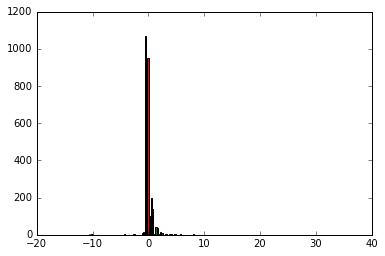

In [63]:
plt.hist(mat, bins=50)

In [64]:
km.fit(mat)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [65]:
dict_pca2 = PCA_ready.make_cluster_dictionary2(km, PAA)

In [66]:
dict_pca2

defaultdict(list,
            {0: ['Aaron Harrison',
              'Aaron Miles',
              'Adonis Thomas',
              'Alando Tucker',
              'Alex Acker',
              'Alex Kirk',
              'Alex Scales',
              'Alvin Williams',
              'Andre Dawkins',
              'Andy Rautins',
              'Anthony Brown',
              'Anthony Grundy',
              'Anthony Roberson',
              'Armon Johnson',
              'Arvydas Macijauskas',
              'Awvee Storey',
              'Billy Thomas',
              'Boban Marjanovic',
              'Bobby Portis',
              "Boniface N'Dong",
              'C.J. Wilcox',
              'Cameron Bairstow',
              'Cameron Payne',
              'Carrick Felix',
              'Cedric Jackson',
              'Cheikh Samb',
              'Chris Taft',
              'Chris Wright',
              'Cliff Alexander',
              'Coby Karl',
              'Courtney Fortson',
              'Cour

# Try with original 8

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
standard_scaler = StandardScaler()

In [69]:
scaled = standard_scaler.fit_transform(PAA)

In [70]:
km.fit(scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [71]:
dict_nonpca = PCA_ready.make_cluster_dictionary2(km, PAA)

In [72]:
dict_nonpca

defaultdict(list,
            {0: ['A.J. Price',
              'Aaron Brooks',
              'Aaron McKie',
              'Aaron Miles',
              'Acie Law',
              'Adam Morrison',
              'Adrian Griffin',
              'Al Harrington',
              'Al Thornton',
              'Alan Anderson',
              'Alando Tucker',
              'Alec Burks',
              'Alex Acker',
              'Alex Scales',
              'Alexey Shved',
              'Allan Ray',
              'Allen Crabbe',
              'Allen Iverson',
              'Alonzo Gee',
              'Andre Barrett',
              'Andre Dawkins',
              'Andre Iguodala',
              'Andre Miller',
              'Andre Owens',
              'Andrea Bargnani',
              'Andrei Kirilenko',
              'Andres Nocioni',
              'Andrew Goudelock',
              'Andrew Wiggins',
              'Anfernee Hardaway',
              'Antawn Jamison',
              'Anthony Carter',
    

# 3D Plot on PCA

In [73]:
from mpl_toolkits.mplot3d import Axes3D

In [74]:
from scripts import makeplot

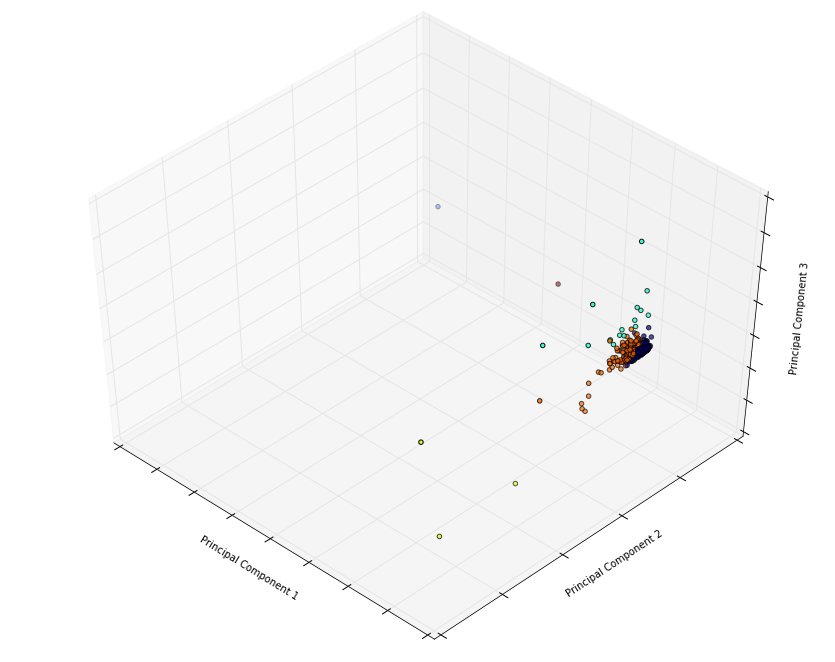

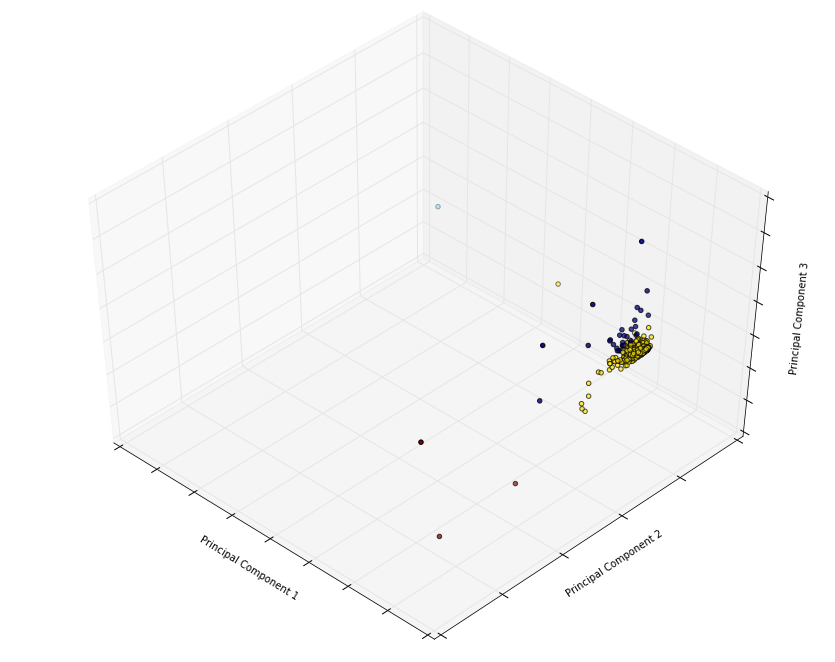

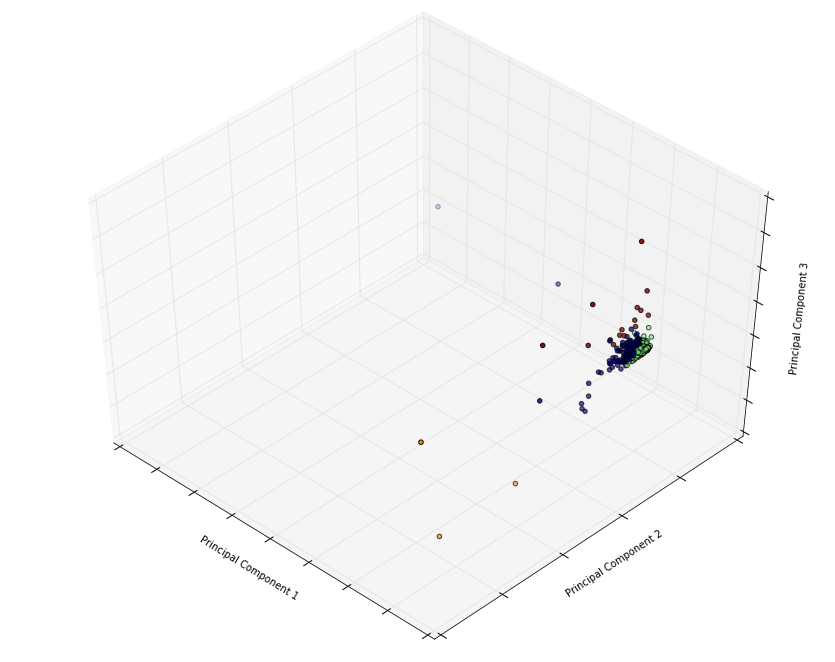

In [75]:
makeplot.make_plots(mat)

In [76]:
mat.head()

,0,1,2
0,-0.083094,-0.126645,0.000859
1,-0.131413,-0.375650,-0.046846
2,-0.108883,-0.172178,-0.291084
3,-0.051564,0.129481,-0.293831
4,0.214081,0.821927,0.568117


#### Points 539, 584, 1046 are problematic

# Find outliers that are messing up PCA

### Drop them from PCA

In [ ]:
PAA_nout = PAA.drop(PAA.index[[539,584,1046]])

In [ ]:
mat_nout, comp_nout = PCA_ready.run_pca(PAA_nout)

In [ ]:
km = KMeans(n_clusters=5, random_state = 30)

In [ ]:
km.fit(mat_nout)

In [ ]:
cluster_id = km.labels_

In [ ]:
dict_pca2_nout = PCA_ready.make_cluster_dictionary2(km, PAA_nout)

In [ ]:
dict_pca2_nout

# Regraph

In [ ]:
makeplot.make_plots(mat_nout)

# Silhouette Score Benchmark

In [ ]:
from scripts import makesilplot

In [ ]:
makesilplot.plot_silhouette(mat_nout, 15)

In [ ]:
makesilplot.cluster_plot(mat_nout, 3)

In [ ]:
makesilplot.cluster_plot(mat_nout, 4)

##### data suggest not really clusterable

In [ ]:
km = KMeans(n_clusters=4, random_state = 30)

In [ ]:
km.fit(mat_nout)

##### lets look at the actual clusters

In [ ]:
dict_pca4_nout = PCA_ready.make_cluster_dictionary2(km, PAA_nout)
dict_pca4_nout[0]

#### despite silhouette scores indicating clusters not optimal, clusters seem to make sense. This cluster has a very high density of guards. Steph Curry, Steve Nash, Russell Westbrook, Chris Paul, Jeremy Lin.

# Start aggregating players

In [ ]:
clusteroneX, clusteroney = RandomForest.date_with_forest(df)


In [ ]:
one_x = clusteroneX[clusteroneX['Player Name'].isin(dict_pca4_nout[0])]
one_y = clusteroney[clusteroney['Player Name'].isin(dict_pca4_nout[0])]

In [ ]:
curryleftx = one_x[one_x['Player Name'] != 'Stephen Curry']
currylefty = one_y[one_y['Player Name'] != 'Stephen Curry']

In [ ]:
onlycurryx = one_x[one_x['Player Name'] == 'Stephen Curry']
onlycurryy = one_y[one_y['Player Name'] == 'Stephen Curry']

In [ ]:
today = datetime.date.today()
stop_average_date = today - datetime.timedelta(120)

In [ ]:
aftercurryx = onlycurryx[onlycurryx['Date'] > stop_average_date]
aftercurryy = onlycurryy[onlycurryy['Date'] > stop_average_date]

In [ ]:
beforecurryx = onlycurryx[onlycurryx['Date'] <= stop_average_date]
beforecurryy = onlycurryy[onlycurryy['Date'] <= stop_average_date]

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
aftercurryx_train, aftercurryx_test, aftercurryy_train, aftercurryy_test = train_test_split(aftercurryx[aftercurryx.columns-['Player Name']-['Date']], aftercurryy.iloc[:,2], test_size = 0.20, random_state = 2)

In [ ]:
ClusterOne_xtrain = pd.concat([curryleftx, beforecurryx, aftercurryx_train])
ClusterOne_ytrain = pd.concat([currylefty['3P'], beforecurryy['3P'], aftercurryy_train])
#ClusterOne_ytrain = ClusterOne_ytrain.append(aftercurryy_train)

In [ ]:
ClusterOne_xtrain = ClusterOne_xtrain.drop('Date', axis=1)

In [ ]:
ClusterOne_rf = RandomForestRegressor()

In [ ]:
ClusterOne_rf.fit(ClusterOne_xtrain.ix[:, ClusterOne_xtrain.columns != 'Player Name'], ClusterOne_ytrain)

In [ ]:
clustcurrypredictions = ClusterOne_rf.predict(aftercurryx_test)

In [ ]:
mean_squared_error(clustcurrypredictions, aftercurryy_test)

In [ ]:
ClusterOne_rf.feature_importances_

In [ ]:
PAA[PAA.index== 'Stephen Curry']

In [ ]:
len(clustcurrypredictions)

In [ ]:
stephavg = np.empty(10)

In [ ]:
stephavg.fill('4.097978')

In [ ]:
mean_squared_error(stephavg, aftercurryy_test)

In [ ]:
clustcurrypredictions

In [ ]:
aftercurryy_test

# Individual Model

In [ ]:
sc, scx, scy = RandomForest.individual_forest_df(forest_df, y_df, 'Stephen Curry')

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
fy, ydf = RandomForest.date_with_forest(df,cutoff=120)

In [ ]:
curry_X = fy[fy['Player Name'] == 'Stephen Curry']
curry_y = ydf[ydf['Player Name'] == 'Stephen Curry']

In [ ]:
scurryX_train, scurryX_test, scurryy_train, scurryy_test = train_test_split(curry_X[curry_X.columns-['Player Name']], curry_y.iloc[:,1], test_size = 0.25, random_state = 30)

In [ ]:
scurryX_test